# Study of the relationship between the max_neurons and the total_number of hits in an event

In [1]:
import json
import os
import sys 
import random
import math
import numpy as np
import pandas as pd
import inspect
import os.path
import matplotlib.pyplot as plt
import heapq
import shutil
from math import atan2,pi

project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(project_root)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub


In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from event_model import event_model as em
from validator import validator_lite as vl
import data_analysis.event_generator as eg
from visual.color_map import Colormap

In [3]:
def load_event(file_name, plot_event=False):
    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    all_modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, all_modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(all_modules)):
        if i % 2 == 0:
            modules_even.append(all_modules[i])
        else:
            modules_odd.append(all_modules[i])

    return json_data_event, (modules_even, modules_odd), all_modules

## Minibias

In [4]:
Json_data_all_events = []
all_tracks = []
all_events = [i for i in range(995)]
#random.seed(40)
#random.shuffle(all_events)

nr_events = 995
event_file_name = "/datasets/minibias/velo_event_"
file_name = project_root + event_file_name

list_max_neurons =  []
list_neurons_total = []
list_hits_total = []

for i in all_events[:nr_events]:
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules, all_modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(all_modules)
        hit_counts = [len(module.hits()) for module in all_modules]
        hits_total = sum(hit_counts)
        list_hits_total.append(hits_total)
        
        max_neurons = 0
        last = 1

        for m in modules[0]: #for all even modules
                n_hits = len(m.hits()) #number of hits in each module

                if last * n_hits > max_neurons: 
                    max_neurons = last * n_hits
                last = n_hits

        last = 1

        for m in modules[1]:# for all odd modules
                n_hits = len(m.hits())
                if last * n_hits > max_neurons:
                   max_neurons = last * n_hits
                last = n_hits
        
        list_max_neurons.append(max_neurons)


In [5]:
print(len(list_max_neurons))
print(len(list_hits_total))

995
995


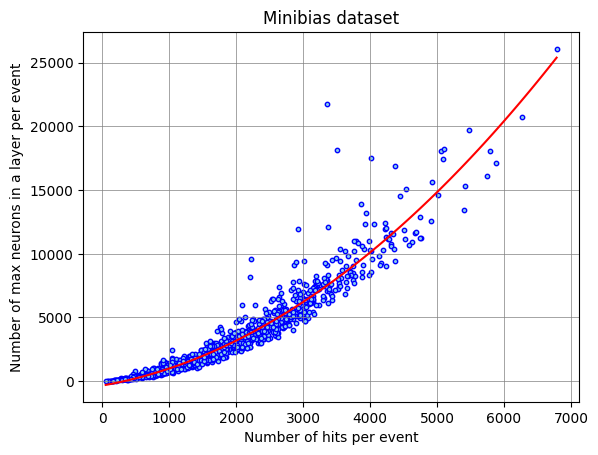

In [13]:
# quick linear regression
x = np.array(list_hits_total)
y = np.array(list_max_neurons)

# create curve 
coefficients = np.polyfit(x, y, 2)
quadratic_fit = np.poly1d(coefficients)
x_curve = np.linspace(min(x), max(x), 100)
y_curve = quadratic_fit(x_curve)

# Create a scatter plot
plt.scatter(x, y,s=10, marker='o', color = "skyblue", edgecolor='blue')
plt.grid(True, color='grey', linewidth=0.5)

# Add the polynomial regression curve to the plot
plt.plot(x_curve, y_curve, color='red')

plt.xlabel('Number of hits per event')
plt.ylabel('Number of max neurons in a layer per event')
plt.title('Minibias dataset')
plt.show()

## Bsphiphi

In [14]:
event_file_name = "/datasets/bsphiphi/velo_event_"
file_name = project_root + event_file_name
nr_events = 1000


json_data_all_events = []
all_events = [i for i in range(nr_events)]
#random.seed(40)
#random.shuffle(all_events)

list_max_neurons_bsphiphi =  []
list_hits_total_bsphiphi = []

for i in all_events[:nr_events]:
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules, all_modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(all_modules)
        hit_counts = [len(module.hits()) for module in all_modules]
        hits_total = sum(hit_counts)
        list_hits_total_bsphiphi.append(hits_total)
        
        max_neurons = 0
        last = 1

        for m in modules[0]: #for all even modules
                n_hits = len(m.hits()) #number of hits in each module

                if last * n_hits > max_neurons: 
                    max_neurons = last * n_hits
                last = n_hits

        last = 1

        for m in modules[1]:# for all odd modules
                n_hits = len(m.hits())
                if last * n_hits > max_neurons:
                   max_neurons = last * n_hits
                last = n_hits
        
        list_max_neurons_bsphiphi.append(max_neurons)


In [15]:
print(len(list_hits_total_bsphiphi))
print(len(list_max_neurons_bsphiphi))

1000
1000


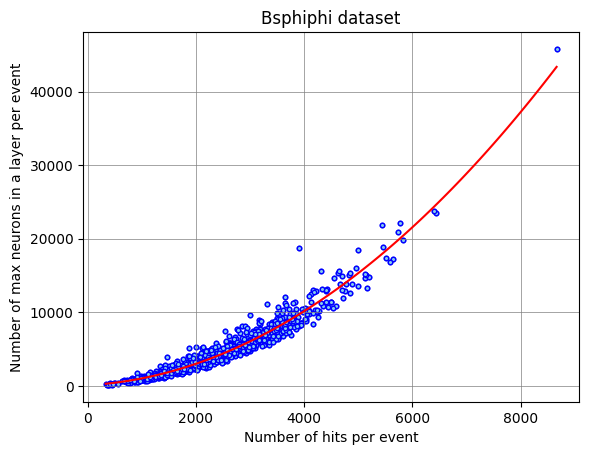

In [17]:
# quick linear regression
x = np.array(list_hits_total_bsphiphi)
y = np.array(list_max_neurons_bsphiphi)
slope, intercept = np.polyfit(x, y, 1)
trendline = slope * np.array(x) + intercept

# Create a scatter plot
plt.scatter(x, y,s=10, marker='o', color = "skyblue", edgecolor='blue')
plt.grid(True, color='grey', linewidth=0.5)

# create curve 
coefficients = np.polyfit(x, y, 2)
quadratic_fit = np.poly1d(coefficients)
x_curve = np.linspace(min(x), max(x), 100)
y_curve = quadratic_fit(x_curve)

# Create a scatter plot
plt.scatter(x, y,s=10, marker='o', color = "skyblue", edgecolor='blue')
plt.grid(True, color='grey', linewidth=0.5)

# Add the polynomial regression curve to the plot
plt.plot(x_curve, y_curve, color='red')

# Add the polynomial regression curve to the plot
plt.xlabel('Number of hits per event')
plt.ylabel('Number of max neurons in a layer per event')
plt.title('Bsphiphi dataset')
plt.show()
